In [ ]:
pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Initial State: (0, 0)


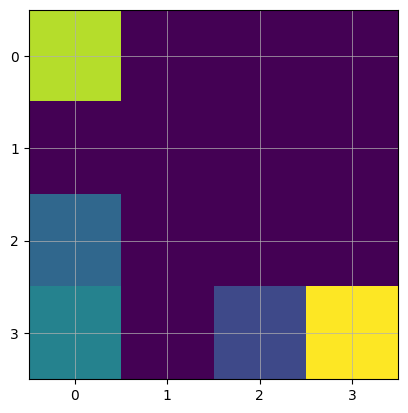

After step 1: State=(0, 0), Action=0, Reward=5.0, Done=False


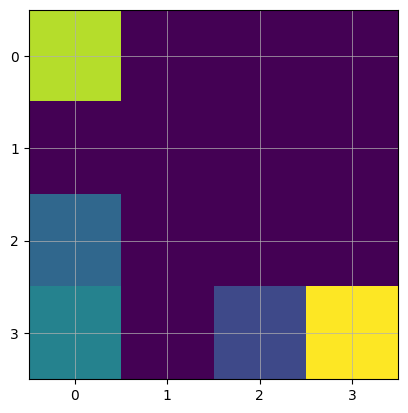

After step 2: State=(0, 0), Action=0, Reward=0.0, Done=False


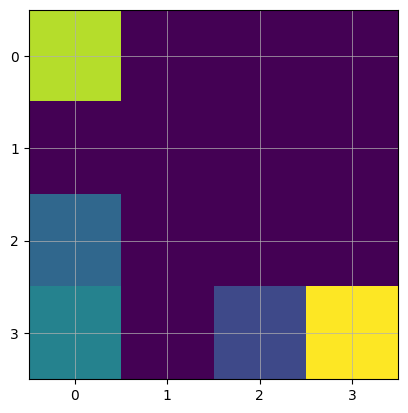

After step 3: State=(0, 0), Action=0, Reward=0.0, Done=False


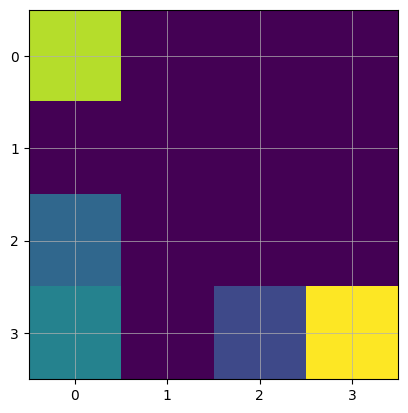

After step 4: State=(0, 0), Action=0, Reward=0.0, Done=False


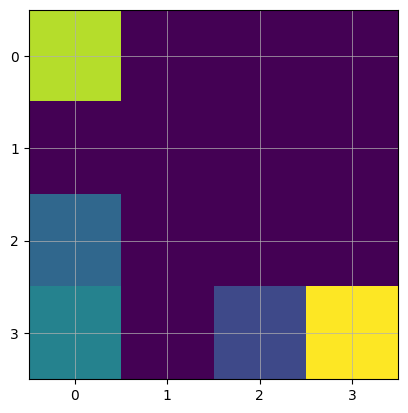

After step 5: State=(0, 1), Action=2, Reward=0.0, Done=False


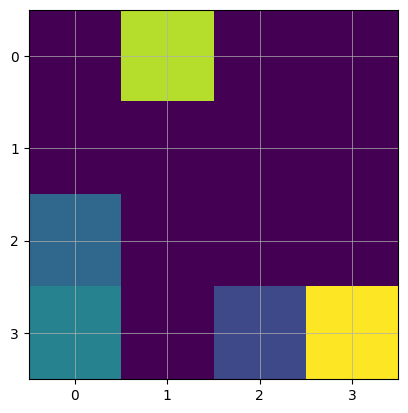

After step 6: State=(0, 0), Action=3, Reward=0.0, Done=False


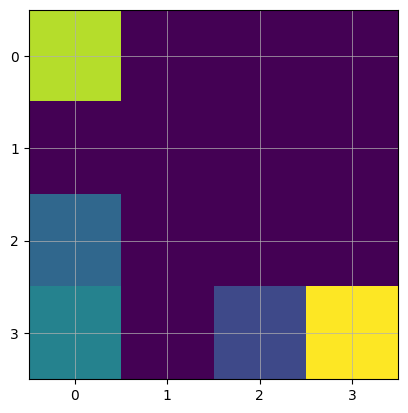

After step 7: State=(1, 0), Action=1, Reward=0.0, Done=False


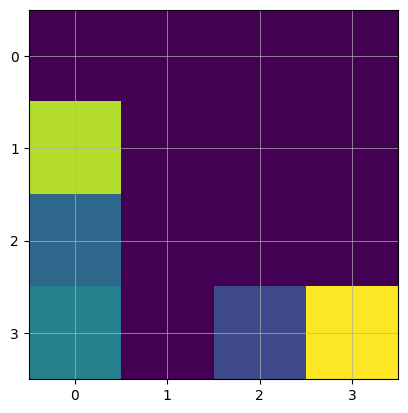

After step 8: State=(0, 0), Action=0, Reward=0.0, Done=False


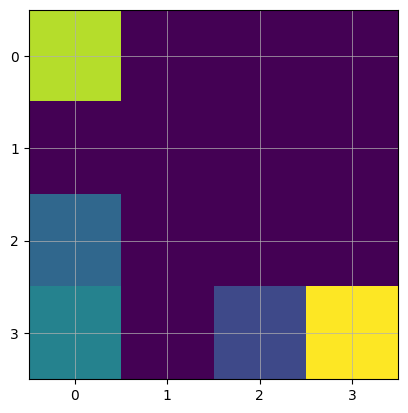

After step 9: State=(0, 1), Action=2, Reward=0.0, Done=False


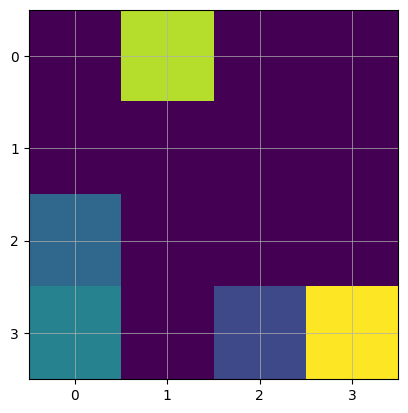

After step 10: State=(1, 1), Action=1, Reward=0.0, Done=False


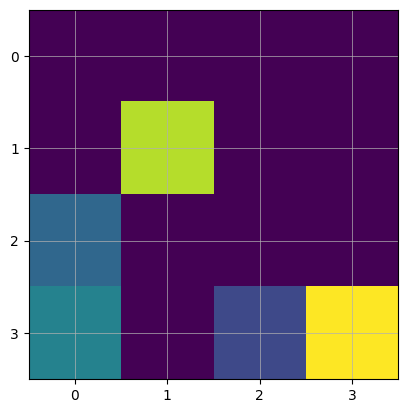

In [ ]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt

class LawnmowerGridWorld(gym.Env):
    def __init__(self):
        # Define action and observation space
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.state_matrix = np.zeros((4, 4))

        # Define rewards
        self.rewards = {-5: 'Rock', -6: 'Rock', 5: 'Battery', 6: 'Battery'}

        # Randomly initialize rewardable slots
        for _ in range(4): # 4 rewards
            x, y = np.random.randint(0, 4, 2)
            reward = np.random.choice(list(self.rewards.keys()))
            self.state_matrix[x, y] = reward

        self.agent_pos = (0, 0)
        self.goal = (3, 3)

    def step(self, action):
        x, y = self.agent_pos

        if action == 0:  # Up
            x = max(0, x - 1)
        elif action == 1:  # Down
            x = min(3, x + 1)
        elif action == 2:  # Right
            y = min(3, y + 1)
        else:  # Left
            y = max(0, y - 1)

        self.agent_pos = (x, y)
        reward = self.state_matrix[x, y]
        self.state_matrix[x, y] = 0  # Remove the reward after collecting

        done = (x, y) == self.goal

        return self.agent_pos, reward, done, {}

    def reset(self):
        self.agent_pos = (0, 0)
        return self.agent_pos

    def render(self):
        grid = np.zeros_like(self.state_matrix)
        for x in range(4):
            for y in range(4):
                if self.state_matrix[x, y] != 0:
                    grid[x, y] = list(self.rewards.keys()).index(self.state_matrix[x, y]) + 1

        grid[self.goal] = 9
        grid[self.agent_pos] = 8

        plt.imshow(grid, cmap='viridis', extent=(-0.5, 3.5, 3.5, -0.5))
        plt.xticks(range(4))
        plt.yticks(range(4))
        plt.grid(True, which='both', linestyle='-', linewidth=0.5)

        plt.show()
        return grid

# Test Environment
env = LawnmowerGridWorld()
state = env.reset()
print('Initial State:', state)
env.render()

# Run Random Agent
for i in range(10):
    action = np.random.choice([0, 1, 2, 3])
    state, reward, done, _ = env.step(action)
    print('After step {}: State={}, Action={}, Reward={}, Done={}'.format(i+1, state, action, reward, done))
    env.render()

    if done:
        break

env.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


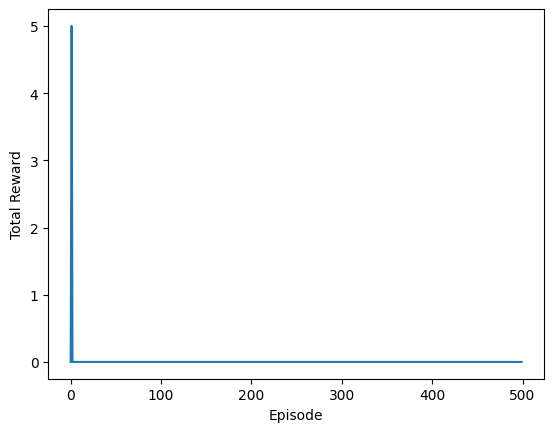

Gamma: 0.9 Epsilon Decay: 0.98 Avg. Reward: 0.0


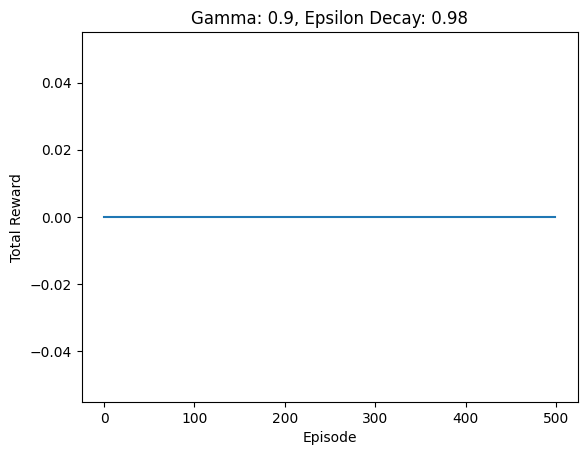

Gamma: 0.9 Epsilon Decay: 0.995 Avg. Reward: 0.0


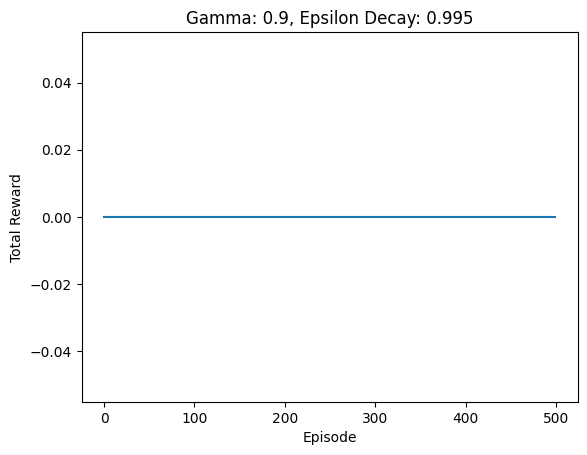

Gamma: 0.9 Epsilon Decay: 0.999 Avg. Reward: 0.0


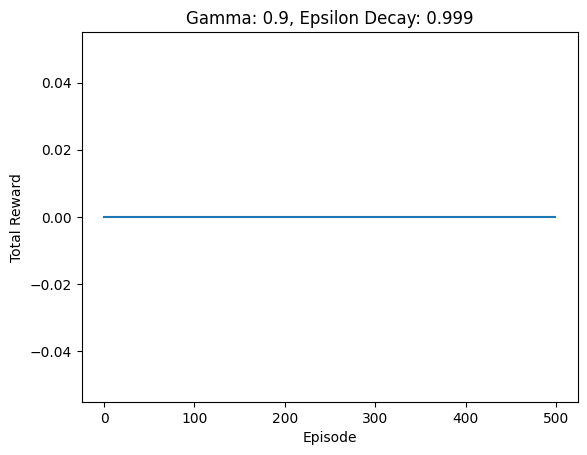

Gamma: 0.99 Epsilon Decay: 0.98 Avg. Reward: 0.0


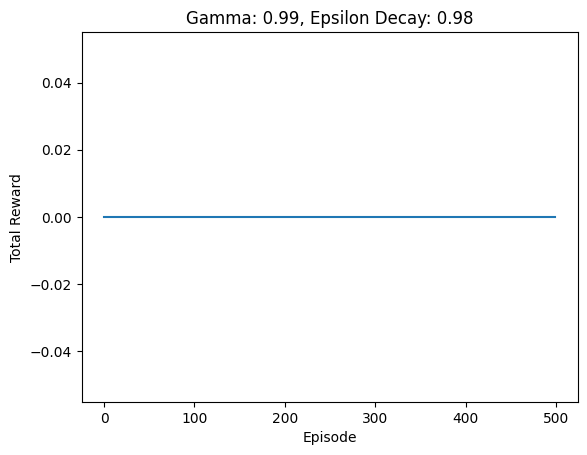

Gamma: 0.99 Epsilon Decay: 0.995 Avg. Reward: 0.0


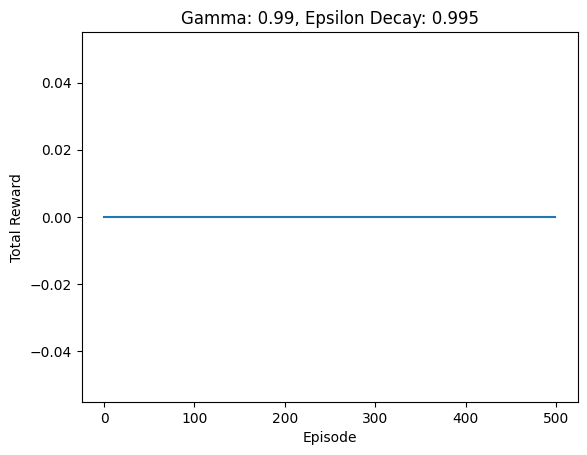

Gamma: 0.99 Epsilon Decay: 0.999 Avg. Reward: 0.0


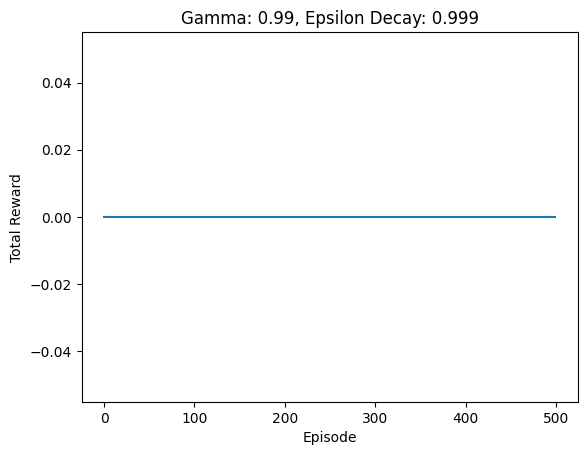

Gamma: 0.999 Epsilon Decay: 0.98 Avg. Reward: 0.0


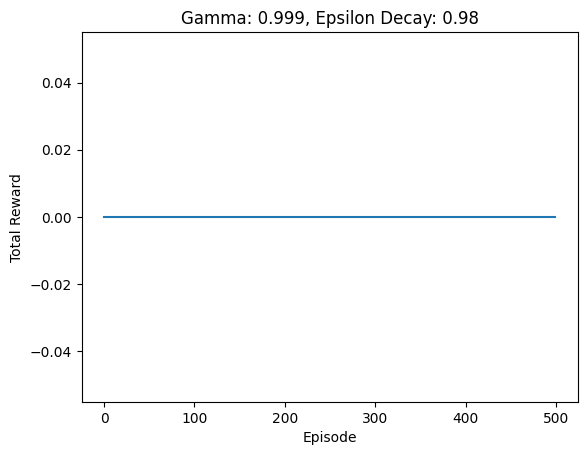

Gamma: 0.999 Epsilon Decay: 0.995 Avg. Reward: 0.0


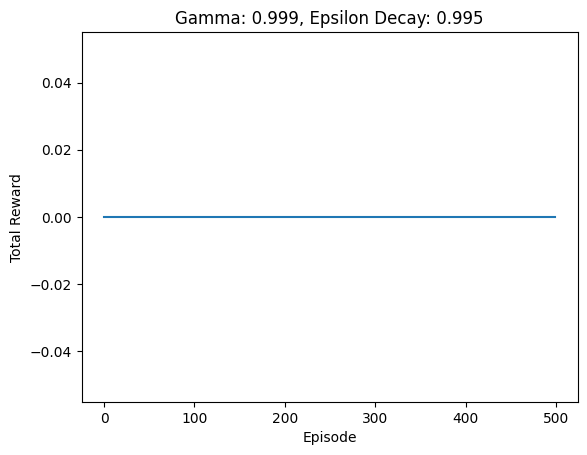

Gamma: 0.999 Epsilon Decay: 0.999 Avg. Reward: 0.0


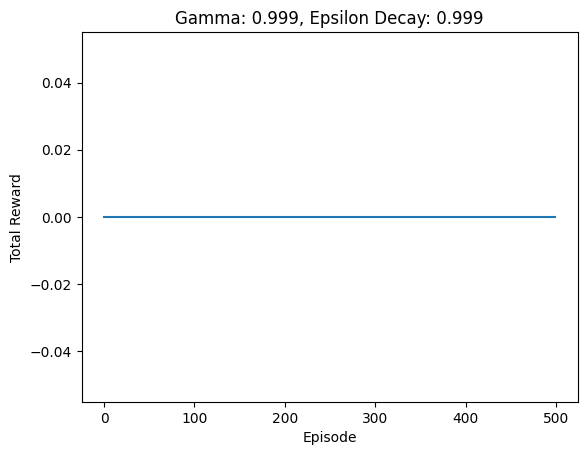

Best Parameters: {'gamma': 0.9, 'epsilon_decay': 0.98}


In [ ]:
import numpy as np

n_states = env.observation_space.n
n_actions = env.action_space.n

# Hyperparameters
n_episodes = 500
alpha = 0.1
gamma = 0.99
epsilon_max = 1.0
epsilon_min = 0.1
epsilon_decay = 0.995

Q = np.zeros((n_states, n_actions))

def select_action(state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])

# SARSA Algorithm
reward_history = []
for episode in range(n_episodes):
    state = env.reset()
    action = select_action(state, epsilon_max * (epsilon_decay ** episode))
    total_reward = 0

    for t in range(100):
        next_state, reward, done, _ = env.step(action)
        next_action = select_action(next_state, epsilon_max * (epsilon_decay ** episode))

        Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

        state = next_state
        action = next_action
        total_reward += reward

        if done:
            break

    reward_history.append(total_reward)

# Plot reward history
plt.plot(reward_history)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()


# Define the parameter search space
param_space = {
    'gamma': [0.90, 0.99, 0.999],
    'epsilon_decay': [0.98, 0.995, 0.999],
}

best_reward = -np.inf
best_params = None

for gamma in param_space['gamma']:
    for epsilon_decay in param_space['epsilon_decay']:
        # Reset Q-values
        Q = np.zeros((n_states, n_actions))

        # Run SARSA with the current parameters
        reward_history = []
        for episode in range(n_episodes):
            state = env.reset()
            action = select_action(state, epsilon_max * (epsilon_decay ** episode))
            total_reward = 0

            for t in range(100):
                next_state, reward, done, _ = env.step(action)
                next_action = select_action(next_state, epsilon_max * (epsilon_decay ** episode))

                Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

                state = next_state
                action = next_action
                total_reward += reward

                if done:
                    break

            reward_history.append(total_reward)

        # Evaluate the current parameters
        avg_reward = np.mean(reward_history[-10:])

        print('Gamma:', gamma, 'Epsilon Decay:', epsilon_decay, 'Avg. Reward:', avg_reward)

        # Plot reward history
        plt.plot(reward_history)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title(f"Gamma: {gamma}, Epsilon Decay: {epsilon_decay}")
        plt.show()

        if avg_reward > best_reward:
            best_reward = avg_reward
            best_params = {'gamma': gamma, 'epsilon_decay': epsilon_decay}

print('Best Parameters:', best_params)